# Physics 215: Chapter 10 (Wavelet and Principal Components Analysis Exercises

by: Juguilon, Vince Paul

2nd Semester, A.Y. 2024-2025

2025/02/20

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# A. Wave Packet Exercise

Consider the following wave packets

[10.10 A] $y_1 = e^{-\frac{t^2}{2}}$

[10.10 B] $y_2 = \sin(8t)e^{-\frac{t^2}{2}}$

[10.10 C] $y_3 = (1-t^2)e^{-\frac{t^2}{2}}$

For each wave packet:

**(a)** Estimate the width $\Delta t$. A good measure might be the full width at half-maxima (FWHM) of $|y(t)|$.

**(b)** Use your DFT program to evaluate and plot the Fourier transform $Y(\omega)$ for each wave packet. Make both a linear and a semilog plot (small components are often important, yet not evident in linear plots). Make sure that your transform has a good number of
closely spaced frequency values over a range that is large enough to show the periodicity of $|Y(\omega)|$.

**(c)** What are the units for $Y(\omega)$ and $\omega$ in your DFT?

**(d)** For each wave packet, estimate the width $\Delta \omega$. A good measure might be the full width at half-maxima of $|Y(\omega)|$.

**(e)** For each wave packet determine approximate value for the constant C of the uncertainty
principle $\Delta t\Delta \omega \geq 2\pi C$ [10.11]


**(a)** For comparison we note a Gaussian function with standard deviation $\sigma$ centered at $t_0$ of the form: $f(x) = e^{-\frac{t-t_0}{2\sigma}}$

Comparing the wavepacket $y_1$ with the Gaussian function indicates that $y_1$ has a standard deviation of $\sigma_1 = 1$. Thus, the FWHM ($\Delta t$) for $y_1$ is given by:

$\Delta t_1 = 2\sqrt{2\ln 2}\sigma_1 \approx 2.35$

Both $y_2$ and $y_3$ are modulated Guassian wave packets, with the same $\sigma = 1$. The functions alter the envelope of the Gaussian packet, but do not affect the spread as demonstrated in the plots indicated below.

In [26]:
# Define time grid
t_max = 10  # Time range
N = 1024    # Number of points
t = np.linspace(-t_max, t_max, N)  # Time vector
dt = t[1] - t[0]  # Time step

# Define wave packets
y1 = np.exp(-t**2 / 2)
y2 = np.sin(8*t) * np.exp(-t**2 / 2)
y3 = (1 - t**2) * np.exp(-t**2 / 2)

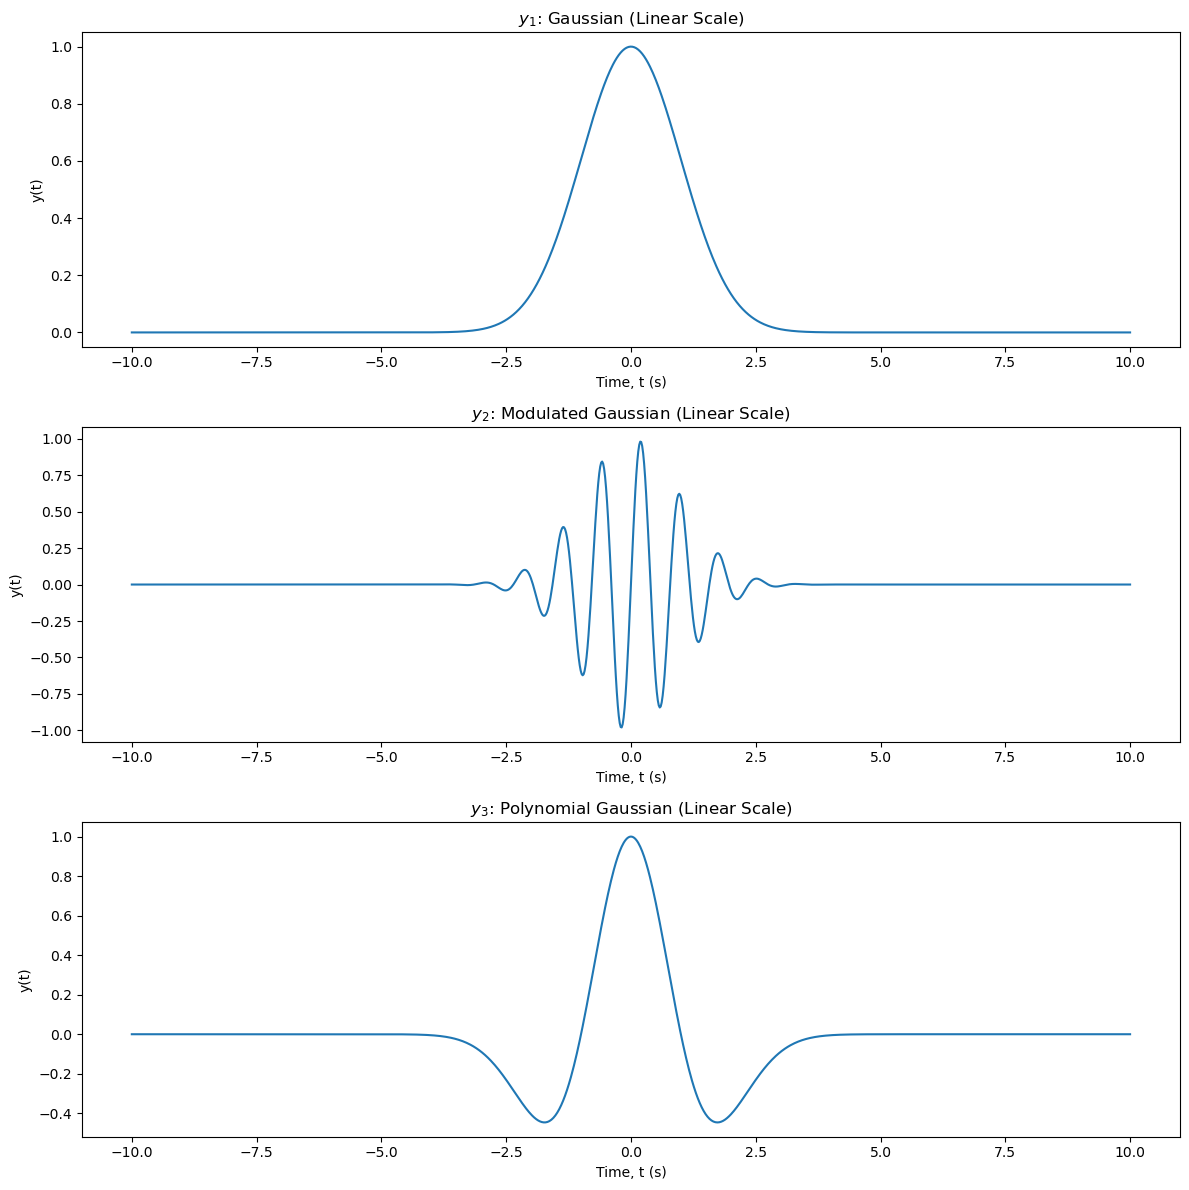

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

for ax, y, title in zip(axes, [y1, y2, y3], ['$y_1$: Gaussian', '$y_2$: Modulated Gaussian', '$y_3$: Polynomial Gaussian']):
    ax.plot(t, y)
    ax.set_title(f"{title} (Linear Scale)")
    ax.set_xlabel('Time, t (s)')
    ax.set_ylabel('y(t)')

# Adjust layout and show
plt.tight_layout()
plt.show()

Therefore, the standard deviation remains the same with

$\Delta y_1 = \Delta y_2 = \Delta y_3 = 2\sqrt{2\ln 2}\sigma \approx 2.35$

**(b)** The linear and semi-log plots of the fourier transforms for $y_1$, $y_2$, and $y_3$ are $Y_1$, $Y_2$, and $Y_3$ which are shown below.

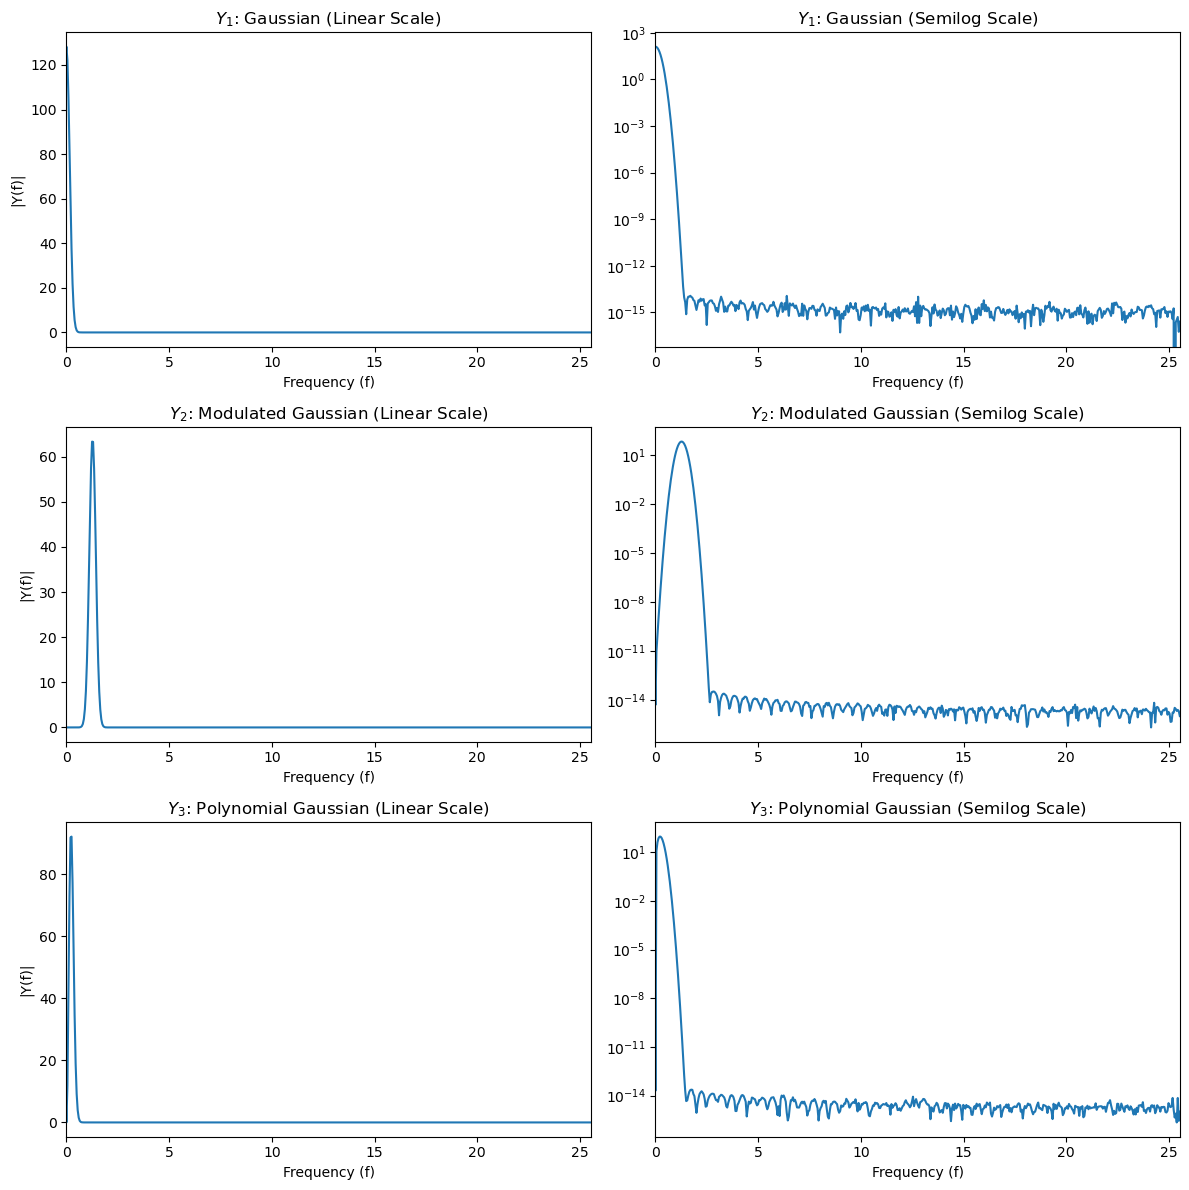

In [39]:
# Compute FFT
Y1 = fft(y1)
Y2 = fft(y2)
Y3 = fft(y3)

# Frequency axis (FFT shift to center)
freqs = fftfreq(N, d=dt)
freqs = np.fft.fftshift(freqs)  # Shift zero frequency to center
Y1 = np.fft.fftshift(Y1)
Y2 = np.fft.fftshift(Y2)
Y3 = np.fft.fftshift(Y3)

# Plot results (linear and semilog)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for ax, Y, title in zip(axes, [Y1, Y2, Y3], ['$Y_1$: Gaussian', '$Y_2$: Modulated Gaussian', '$Y_3$: Polynomial Gaussian']):
    ax[0].plot(freqs, np.abs(Y))
    ax[0].set_title(f"{title} (Linear Scale)")
    ax[0].set_xlabel('Frequency (f)')
    ax[0].set_ylabel('|Y(f)|')
    ax[0].set_xlim(0, max(freqs))

    ax[1].semilogy(freqs, np.abs(Y))
    ax[1].set_title(f"{title} (Semilog Scale)")
    ax[1].set_xlabel('Frequency (f)')
    ax[1].set_xlim(0, max(freqs))

plt.tight_layout()
plt.show()


**(c)** After performing the fourier transform of a function $y(t)$ where $t$ has units of *second*, the resulting function will be $Y(\omega)$. Here, $\omega$ will have units of $2\pi t^{-1} = 2\pi \nu$ or *radians per second*. However, the `fft` function from `scipy.fftpack` returns the function $Y(\nu)$ where $\nu = \frac{\omega}{2\pi}$. For instance, the peak of $Y_2$ is centered at around $\nu_0 = 1.27 = \frac{\omega_0 = 8}{2\pi}$.

**(d)** For $y_1$, the fourier transform of a gaussian function is another gaussian function, i.e.

$Y_1(\omega) = e^{-\frac{\omega^2}{2}}$

Thus, we calculate $\Delta \omega$ similar ot part (a) as:

$\Delta \omega \approx 2.35$

A quick confirmation by estimating graphically from the plot below indicate that $\Delta \nu = \frac{2\pi}{\Delta \omega} = 0.374$.

For $Y_2$, we expect the same $\Delta \omega$ since the introduction of the $\sin(8t)$ envelope introduced a shifted peak to $\omega_0=8$.

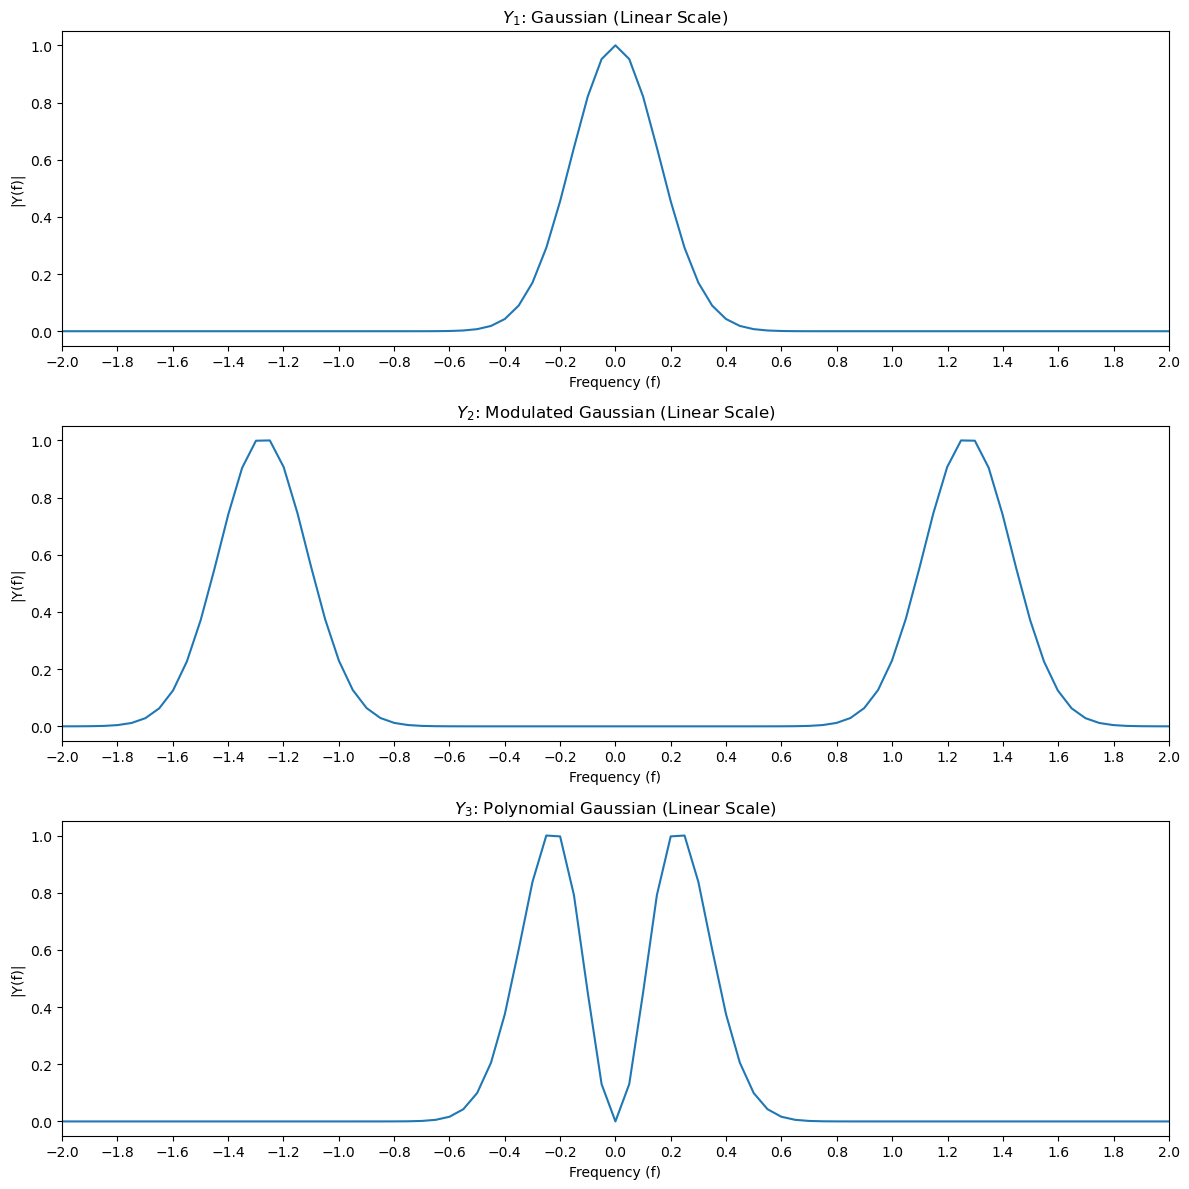

In [52]:
# Compute FFT
Y1 = fft(y1)
Y2 = fft(y2)
Y3 = fft(y3)

# Frequency axis (FFT shift to center)
freqs = fftfreq(N, d=dt)
freqs = np.fft.fftshift(freqs)  # Shift zero frequency to center
Y1 = np.fft.fftshift(Y1)
Y2 = np.fft.fftshift(Y2)
Y3 = np.fft.fftshift(Y3)

# **Normalize FFT magnitude**
Y1_norm = Y1/np.max(np.abs(Y1))
Y2_norm = Y2/np.max(np.abs(Y2))
Y3_norm = Y3/np.max(np.abs(Y3))

# Plot results (linear and semilog)
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

for ax, Y, title in zip(axes, [Y1_norm, Y2_norm, Y3_norm], ['$Y_1$: Gaussian', '$Y_2$: Modulated Gaussian', '$Y_3$: Polynomial Gaussian']):
    ax.plot(freqs, np.abs(Y))
    ax.set_title(f"{title} (Linear Scale)")
    ax.set_xlabel('Frequency (f)')
    ax.set_ylabel('|Y(f)|')
    ax.set_xlim(-2, 2)
    ax.set_xticks(np.linspace(-2, 2, 21))
    
plt.tight_layout()
plt.show()


**(e)** Solving for $C_1$ forom $\Delta t_1\Delta \omega_1 \geq 2\pi C_1$ gives $C_1 = 0.879$. (?)